# Python packages for graph analysis
- igraph\-python : https://igraph.org/python/
- networkx : https://networkx.github.io/documentation/stable

In [ ]:
!pip install networkx

In [1]:
import networkx as nx
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

# Dataset : Data Science for COVID-19 in South Korea (DS4C)
- dataset : https://www.kaggle.com/kimjihoo/coronavirusdataset/data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# load dataset
df = pd.read_csv('/content/drive/My Drive/실습자료/PatientInfo.csv', dtype={'patient_id':str, 'infected_by': str})

In [ ]:
# drop rows where infected_by == NaN
print(df.shape)
df

(3128, 18)


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,7000000005,9120.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,20.0,NaN,2020-03-24,NaN,NaN,isolated
3124,7000000006,9087.0,male,NaN,30s,United States,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,23.0,NaN,2020-03-24,NaN,NaN,isolated
3125,7000000007,NaN,female,1996.0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,26.0,NaN,2020-03-25,NaN,NaN,isolated
3126,7000000008,NaN,female,NaN,10s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,NaN,2020-03-27,NaN,NaN,isolated


In [ ]:
df.loc[:,('infected_by','patient_id')].dropna().values.tolist()[:3]

[['2002000001', '1000000003'],
 ['1000000002', '1000000005'],
 ['1000000003', '1000000006']]

## Create a directed graph
- nodes : 환자 (patient)
- edges : 감염 방향 (`infected_by` -> `patient_id`)

In [5]:
g = nx.DiGraph(df.loc[:,('infected_by','patient_id')].dropna().values.tolist()) # [(vs_id, vs_id)]

In [ ]:
g.nodes

NodeView(('2002000001', '1000000003', '1000000002', '1000000005', '1000000006', '1000000007', '1000000010', '1000000017', '1000000013', '1000000014', '1000000016', '1000000021', '1000000019', '1000000015', '1000000020', '1000000022', '1000000025', '1000000028', '1000000029', '1000000031', '1000000033', '1000000034', '1000000037', '1500000002', '1000000040', '1000000045', '1000000041', '1000000046', '1000000054', '1000000053', '1000000060', '1000000059', '1000000061', '2017000005', '1000000062', '1000000047', '1000000064', '1000000068', '1000000065', '1000000067', '1000000078', '1000000111', '1000000113', '1000000115', '1000000114', '1000000117', '1000000118', '1000000119', '1000000120', '1000000121', '1000000126', '1000000108', '1000000127', '1000000128', '1000000129', '1000000100', '1000000130', '1000000134', '1000000140', '1000000164', '1000000124', '1000000174', '1000000178', '1000000188', '1000000189', '1000000116', '1000000191', '1000000221', '1000000211', '1000000224', '100000021

In [ ]:
g.edges

OutEdgeView([('2002000001', '1000000003'), ('1000000003', '1000000006'), ('1000000003', '1000000007'), ('1000000003', '1000000010'), ('1000000003', '1000000017'), ('1000000002', '1000000005'), ('1000000017', '1000000013'), ('1000000017', '1000000016'), ('1000000013', '1000000014'), ('1000000014', '2000000019'), ('1000000016', '1000000021'), ('1000000021', '1000000019'), ('1000000015', '1000000020'), ('1000000020', '1000000078'), ('1000000022', '1000000025'), ('1000000022', '1000000061'), ('1000000028', '1000000029'), ('1000000031', '1000000033'), ('1000000031', '1000000034'), ('1000000031', '1000000037'), ('1000000033', '1000000045'), ('1000000033', '1000000067'), ('1500000002', '1000000040'), ('1500000002', '1500000003'), ('1000000040', '1000000117'), ('1000000041', '1000000046'), ('1000000054', '1000000053'), ('1000000054', '1000000060'), ('1000000060', '1000000059'), ('2017000005', '1000000062'), ('1000000047', '1000000064'), ('1000000068', '1000000065'), ('1000000111', '1000000113'

In [ ]:
len(g.nodes)
a = set(g.nodes)
len(g.nodes), len(a)

(946, 946)

In [ ]:
len(g.edges)

735

- Accessing neighbors and edges

In [ ]:
g.degree() #key = node_id, value = degree

DiDegreeView({'2002000001': 1, '1000000003': 5, '1000000002': 1, '1000000005': 1, '1000000006': 1, '1000000007': 1, '1000000010': 1, '1000000017': 3, '1000000013': 2, '1000000014': 2, '1000000016': 2, '1000000021': 2, '1000000019': 1, '1000000015': 1, '1000000020': 2, '1000000022': 2, '1000000025': 1, '1000000028': 1, '1000000029': 1, '1000000031': 3, '1000000033': 3, '1000000034': 1, '1000000037': 1, '1500000002': 2, '1000000040': 2, '1000000045': 1, '1000000041': 1, '1000000046': 1, '1000000054': 2, '1000000053': 1, '1000000060': 2, '1000000059': 1, '1000000061': 1, '2017000005': 1, '1000000062': 1, '1000000047': 1, '1000000064': 1, '1000000068': 1, '1000000065': 1, '1000000067': 1, '1000000078': 1, '1000000111': 2, '1000000113': 1, '1000000115': 1, '1000000114': 2, '1000000117': 1, '1000000118': 1, '1000000119': 1, '1000000120': 4, '1000000121': 1, '1000000126': 1, '1000000108': 1, '1000000127': 2, '1000000128': 1, '1000000129': 1, '1000000100': 2, '1000000130': 2, '1000000134': 1, 

In [ ]:
g.in_degree()

InDegreeView({'2002000001': 0, '1000000003': 1, '1000000002': 0, '1000000005': 1, '1000000006': 1, '1000000007': 1, '1000000010': 1, '1000000017': 1, '1000000013': 1, '1000000014': 1, '1000000016': 1, '1000000021': 1, '1000000019': 1, '1000000015': 0, '1000000020': 1, '1000000022': 0, '1000000025': 1, '1000000028': 0, '1000000029': 1, '1000000031': 0, '1000000033': 1, '1000000034': 1, '1000000037': 1, '1500000002': 0, '1000000040': 1, '1000000045': 1, '1000000041': 0, '1000000046': 1, '1000000054': 0, '1000000053': 1, '1000000060': 1, '1000000059': 1, '1000000061': 1, '2017000005': 0, '1000000062': 1, '1000000047': 0, '1000000064': 1, '1000000068': 0, '1000000065': 1, '1000000067': 1, '1000000078': 1, '1000000111': 0, '1000000113': 1, '1000000115': 0, '1000000114': 1, '1000000117': 1, '1000000118': 1, '1000000119': 1, '1000000120': 0, '1000000121': 1, '1000000126': 1, '1000000108': 0, '1000000127': 1, '1000000128': 1, '1000000129': 1, '1000000100': 0, '1000000130': 1, '1000000134': 1, 

In [ ]:
g.out_degree()

OutDegreeView({'2002000001': 1, '1000000003': 4, '1000000002': 1, '1000000005': 0, '1000000006': 0, '1000000007': 0, '1000000010': 0, '1000000017': 2, '1000000013': 1, '1000000014': 1, '1000000016': 1, '1000000021': 1, '1000000019': 0, '1000000015': 1, '1000000020': 1, '1000000022': 2, '1000000025': 0, '1000000028': 1, '1000000029': 0, '1000000031': 3, '1000000033': 2, '1000000034': 0, '1000000037': 0, '1500000002': 2, '1000000040': 1, '1000000045': 0, '1000000041': 1, '1000000046': 0, '1000000054': 2, '1000000053': 0, '1000000060': 1, '1000000059': 0, '1000000061': 0, '2017000005': 1, '1000000062': 0, '1000000047': 1, '1000000064': 0, '1000000068': 1, '1000000065': 0, '1000000067': 0, '1000000078': 0, '1000000111': 2, '1000000113': 0, '1000000115': 1, '1000000114': 1, '1000000117': 0, '1000000118': 0, '1000000119': 0, '1000000120': 4, '1000000121': 0, '1000000126': 0, '1000000108': 1, '1000000127': 1, '1000000128': 0, '1000000129': 0, '1000000100': 2, '1000000130': 1, '1000000134': 0,

## Adding attributes to nodes, and edges

### Node attributes

In [ ]:
g.nodes['1000000003']['age'] = '50s'

In [ ]:
g.nodes.data()

NodeDataView({'2002000001': {}, '1000000003': {'age': '50s'}, '1000000002': {}, '1000000005': {}, '1000000006': {}, '1000000007': {}, '1000000010': {}, '1000000017': {}, '1000000013': {}, '1000000014': {}, '1000000016': {}, '1000000021': {}, '1000000019': {}, '1000000015': {}, '1000000020': {}, '1000000022': {}, '1000000025': {}, '1000000028': {}, '1000000029': {}, '1000000031': {}, '1000000033': {}, '1000000034': {}, '1000000037': {}, '1500000002': {}, '1000000040': {}, '1000000045': {}, '1000000041': {}, '1000000046': {}, '1000000054': {}, '1000000053': {}, '1000000060': {}, '1000000059': {}, '1000000061': {}, '2017000005': {}, '1000000062': {}, '1000000047': {}, '1000000064': {}, '1000000068': {}, '1000000065': {}, '1000000067': {}, '1000000078': {}, '1000000111': {}, '1000000113': {}, '1000000115': {}, '1000000114': {}, '1000000117': {}, '1000000118': {}, '1000000119': {}, '1000000120': {}, '1000000121': {}, '1000000126': {}, '1000000108': {}, '1000000127': {}, '1000000128': {}, '1

In [6]:
df.set_index('patient_id')['age']

patient_id
1000000001    50s
1000000002    30s
1000000003    50s
1000000004    20s
1000000005    20s
             ... 
7000000005    20s
7000000006    30s
7000000007    20s
7000000008    10s
7000000009    20s
Name: age, Length: 3128, dtype: object

In [7]:
nx.set_node_attributes(g,df.set_index('patient_id')['age'],'age')

In [8]:
g.nodes.data()

NodeDataView({'2002000001': {}, '1000000003': {'age': '50s'}, '1000000002': {'age': '30s'}, '1000000005': {'age': '20s'}, '1000000006': {'age': '50s'}, '1000000007': {'age': '20s'}, '1000000010': {'age': '60s'}, '1000000017': {'age': '70s'}, '1000000013': {'age': '80s'}, '1000000014': {'age': '60s'}, '1000000016': {'age': '70s'}, '1000000021': {'age': '80s'}, '1000000019': {'age': '70s'}, '1000000015': {'age': '70s'}, '1000000020': {'age': '70s'}, '1000000022': {'age': '30s'}, '1000000025': {'age': '60s'}, '1000000028': {'age': '70s'}, '1000000029': {'age': '20s'}, '1000000031': {'age': '50s'}, '1000000033': {'age': '50s'}, '1000000034': {'age': '20s'}, '1000000037': {'age': '40s'}, '1500000002': {'age': '60s'}, '1000000040': {'age': '60s'}, '1000000045': {'age': '40s'}, '1000000041': {'age': '50s'}, '1000000046': {'age': '20s'}, '1000000054': {'age': '80s'}, '1000000053': {'age': '40s'}, '1000000060': {'age': '80s'}, '1000000059': {'age': '60s'}, '1000000061': {'age': '60s'}, '2017000

### Edge attributes

In [ ]:
g.edges['2002000001','1000000003']['infection_case'] = 'confact with patient'

In [ ]:
g.edges.data()

OutEdgeDataView([('2002000001', '1000000003', {'infection_case': 'confact with patient'}), ('1000000003', '1000000006', {}), ('1000000003', '1000000007', {}), ('1000000003', '1000000010', {}), ('1000000003', '1000000017', {}), ('1000000002', '1000000005', {}), ('1000000017', '1000000013', {}), ('1000000017', '1000000016', {}), ('1000000013', '1000000014', {}), ('1000000014', '2000000019', {}), ('1000000016', '1000000021', {}), ('1000000021', '1000000019', {}), ('1000000015', '1000000020', {}), ('1000000020', '1000000078', {}), ('1000000022', '1000000025', {}), ('1000000022', '1000000061', {}), ('1000000028', '1000000029', {}), ('1000000031', '1000000033', {}), ('1000000031', '1000000034', {}), ('1000000031', '1000000037', {}), ('1000000033', '1000000045', {}), ('1000000033', '1000000067', {}), ('1500000002', '1000000040', {}), ('1500000002', '1500000003', {}), ('1000000040', '1000000117', {}), ('1000000041', '1000000046', {}), ('1000000054', '1000000053', {}), ('1000000054', '100000006

In [9]:
nx.set_edge_attributes(g, df.set_index(['infected_by','patient_id'])['infection_case'],'infection_case') # ex. {(1,3): val}

In [ ]:
g.edges.data()

OutEdgeDataView([('2002000001', '1000000003', {'infection_case': 'contact with patient'}), ('1000000003', '1000000006', {'infection_case': 'contact with patient'}), ('1000000003', '1000000007', {'infection_case': 'contact with patient'}), ('1000000003', '1000000010', {'infection_case': 'contact with patient'}), ('1000000003', '1000000017', {'infection_case': 'contact with patient'}), ('1000000002', '1000000005', {'infection_case': 'contact with patient'}), ('1000000017', '1000000013', {'infection_case': 'contact with patient'}), ('1000000017', '1000000016', {'infection_case': 'contact with patient'}), ('1000000013', '1000000014', {'infection_case': 'contact with patient'}), ('1000000014', '2000000019', {'infection_case': 'contact with patient'}), ('1000000016', '1000000021', {'infection_case': 'contact with patient'}), ('1000000021', '1000000019', {'infection_case': 'contact with patient'}), ('1000000015', '1000000020', {'infection_case': 'Seongdong-gu APT'}), ('1000000020', '100000007

## Analyze a graph 

In [ ]:
def viewer(_dict_data, col_name):
    df = pd.DataFrame().from_dict(_dict_data, orient='index', columns=[col_name])
    print(df.sort_values(col_name, ascending=False).head(10))
    return df

In [10]:
def viewer2(_dict_data, col_name):
  result = pd.DataFrame().from_dict(_dict_data, orient='index', columns=[col_name])
  return df.set_index('patient_id').join(result,how='right').sort_values(col_name,ascending=False).head(10)

### Page Rank
- Reference : [networkx.algorithms.link_analysis.pagerank_alg.pagerank](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank)

In [ ]:
pagerank = nx.pagerank(g)
pagerank

{'1000000002': 0.0007737758123375612,
 '1000000003': 0.001431760731373337,
 '1000000005': 0.001431760731373337,
 '1000000006': 0.001078163197631406,
 '1000000007': 0.001078163197631406,
 '1000000010': 0.001078163197631406,
 '1000000013': 0.0012322024467171734,
 '1000000014': 0.001821632112698022,
 '1000000015': 0.0007737758123375612,
 '1000000016': 0.0012322024467171734,
 '1000000017': 0.001078163197631406,
 '1000000019': 0.0023229259618468344,
 '1000000020': 0.001431760731373337,
 '1000000021': 0.001821632112698022,
 '1000000022': 0.0007737758123375612,
 '1000000023': 0.0007737758123375612,
 '1000000025': 0.001102768271855449,
 '1000000028': 0.0007737758123375612,
 '1000000029': 0.001431760731373337,
 '1000000031': 0.0007737758123375612,
 '1000000033': 0.0009931041186828197,
 '1000000034': 0.0009931041186828197,
 '1000000037': 0.0009931041186828197,
 '1000000040': 0.001102768271855449,
 '1000000041': 0.0007737758123375612,
 '1000000045': 0.0011960290422120495,
 '1000000046': 0.0014317

In [ ]:
pagerank = viewer2(pagerank,'pagerank')
pagerank

,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,pagerank
4100000118,NaN,female,1958.0,60s,Korea,Chungcheongnam-do,Hongseong-gun,NaN,overseas inflow,NaN,4100000116,5.0,NaN,2020-03-17,NaN,NaN,isolated,0.004814
6009000008,NaN,female,1956.0,60s,Korea,Gyeongsangbuk-do,Sangju-si,NaN,contact with patient,NaN,6009000007,NaN,NaN,2020-02-26,2020-03-23,NaN,released,0.004814
4100000116,NaN,male,1955.0,60s,Korea,Chungcheongnam-do,Hongseong-gun,NaN,overseas inflow,NaN,4100000118,0.0,2020-03-16,2020-03-17,2020-04-03,NaN,released,0.004814
1100000028,NaN,female,1955.0,60s,Korea,Busan,Suyeong-gu,NaN,contact with patient,NaN,1100000028,8.0,2020-02-22,2020-02-23,NaN,NaN,released,0.004814
4100000052,NaN,female,1978.0,40s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4100000070,7.0,2020-02-24,2020-02-29,2020-03-18,NaN,released,0.004814
4100000070,NaN,male,2007.0,10s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4100000052,0.0,NaN,2020-03-01,2020-03-18,NaN,released,0.004814
6009000007,NaN,male,1948.0,70s,Korea,Gyeongsangbuk-do,Sangju-si,NaN,contact with patient,NaN,6009000008,NaN,NaN,2020-02-26,2020-03-23,NaN,released,0.004814
2000000012,32.0,female,2009.0,10s,Korea,Gyeonggi-do,Suwon-si,NaN,contact with patient,NaN,2000000007,NaN,NaN,2020-02-18,2020-03-04,NaN,released,0.002467
2000000019,362.0,male,1956.0,60s,Korea,Gyeonggi-do,Anyang-si,NaN,contact with patient,6.0,1000000014,32.0,NaN,2020-02-22,NaN,NaN,isolated,0.002323
1000000019,112.0,female,1941.0,70s,Korea,Seoul,Jongno-gu,NaN,contact with patient,5.0,1000000021,NaN,NaN,2020-02-20,2020-03-08,NaN,released,0.002323


### Node Centrality
- degree centrality : 연결된 node가 많을 수록 큼. `nx.degree_centrality(g), nx.in_degree_centrality(g), nx.out_degree_centrality(g)`
- closeness centrality : 모든 node와의 거리가 가까울 수록 큼. `nx.closeness_centrality(g)`
- betweenness centrality : 노드 간의 경로에 있을 수록 큼. `nx.betweenness centrality(g, normalized=True)`
- eigenvector centrality : 큰 네트워크와 연결되있는 사람일 수록 큼. `nx.eigenvector_centrality(g)`
- *Reference* : [Centrality](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html)

In [ ]:
degree_centrality = nx.degree_centrality(g)
degree_centrality = viewer2(degree_centrality, 'degree_centrality')
degree_centrality

,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,degree_centrality
2000000205,8100.0,female,1946.0,70s,Korea,Gyeonggi-do,Seongnam-si,NaN,contact with patient,NaN,1000000138,8.0,NaN,2020-03-14,NaN,NaN,isolated,0.055026
4100000008,NaN,female,1974.0,40s,Korea,Chungcheongnam-do,Cheonan-si,NaN,gym facility in Cheonan,NaN,NaN,130.0,2020-02-20,2020-02-26,2020-03-29,NaN,released,0.028571
2000000167,7663.0,female,1976.0,40s,Korea,Gyeonggi-do,Bucheon-si,NaN,contact with patient,NaN,1000000125,NaN,NaN,2020-03-10,NaN,NaN,isolated,0.026455
4100000006,NaN,female,1978.0,40s,Korea,Chungcheongnam-do,Asan-si,NaN,contact with patient,NaN,4100000007,41.0,2020-02-22,2020-02-26,2020-03-22,NaN,released,0.023280
2000000309,8632.0,female,1935.0,80s,Korea,Gyeonggi-do,Gunpo-si,NaN,etc,NaN,NaN,NaN,2020-03-18,2020-03-19,NaN,NaN,isolated,0.022222
1000000125,7265.0,female,1964.0,50s,Korea,Seoul,Nowon-gu,NaN,Guro-gu Call Center,NaN,NaN,NaN,NaN,2020-03-08,NaN,NaN,isolated,0.019048
1200000031,31.0,female,1959.0,60s,Korea,Daegu,NaN,NaN,Shincheonji Church,NaN,NaN,1160.0,NaN,2020-02-18,NaN,NaN,isolated,0.017989
2000000508,9928.0,female,1973.0,40s,Korea,Gyeonggi-do,Pyeongtaek-si,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-01,NaN,NaN,isolated,0.015873
2000000125,6780.0,male,1938.0,80s,Korea,Gyeonggi-do,Seongnam-si,NaN,etc,NaN,NaN,3.0,NaN,2020-03-07,NaN,NaN,isolated,0.011640
2000000476,9742.0,female,1938.0,80s,Korea,Gyeonggi-do,Uijeongbu-si,NaN,etc,NaN,NaN,NaN,2020-03-29,2020-03-30,NaN,NaN,isolated,0.009524


In [ ]:
closeness_centrality = nx.closeness_centrality(g)
closeness_centrality = viewer2(closeness_centrality,'closeness_centrality')
closeness_centrality

,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,closeness_centrality
2000000019,362.0,male,1956.0,60s,Korea,Gyeonggi-do,Anyang-si,NaN,contact with patient,6.0,1000000014,32.0,NaN,2020-02-22,NaN,NaN,isolated,0.001764
1000000019,112.0,female,1941.0,70s,Korea,Seoul,Jongno-gu,NaN,contact with patient,5.0,1000000021,NaN,NaN,2020-02-20,2020-03-08,NaN,released,0.001764
4100000084,NaN,male,1981.0,30s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4100000086,11.0,2020-02-25,2020-03-04,2020-03-23,NaN,released,0.001693
2000000107,5471.0,male,1976.0,40s,Korea,Gyeonggi-do,Hwaseong-si,NaN,contact with patient,NaN,2000000104,NaN,NaN,2020-03-04,NaN,NaN,isolated,0.001693
2000000284,8541.0,male,2014.0,0s,Korea,Gyeonggi-do,Hwaseong-si,NaN,contact with patient,NaN,2000000104,NaN,NaN,2020-03-18,NaN,NaN,isolated,0.001693
4100000088,NaN,female,2014.0,0s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4100000086,0.0,NaN,2020-03-05,2020-03-20,NaN,released,0.001693
1000000021,136.0,male,1936.0,80s,Korea,Seoul,Jongno-gu,NaN,contact with patient,5.0,1000000016,NaN,NaN,2020-02-20,2020-03-08,NaN,released,0.001693
4100000087,NaN,male,2008.0,10s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4100000086,2.0,NaN,2020-03-05,2020-04-01,NaN,released,0.001693
1000000014,30.0,female,1952.0,60s,Korea,Seoul,Jongno-gu,NaN,contact with patient,5.0,1000000013,27.0,2020-02-06,2020-02-16,2020-03-12,NaN,released,0.001693
2000000108,5362.0,female,2007.0,10s,Korea,Gyeonggi-do,Hwaseong-si,NaN,contact with patient,NaN,2000000104,NaN,NaN,2020-03-04,NaN,NaN,isolated,0.001693


In [ ]:
betweenness_centrality = nx.betweenness_centrality(g, normalized=True) # normalized는 비율화한것, 일반적으로 이렇게 많이 쓰임
betweenness_centrality = viewer2(betweenness_centrality,'betweenness_centrality')
betweenness_centrality

,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,betweenness_centrality
2000000205,8100.0,female,1946.0,70s,Korea,Gyeonggi-do,Seongnam-si,NaN,contact with patient,NaN,1000000138,8.0,NaN,2020-03-14,NaN,NaN,isolated,0.000066
4100000006,NaN,female,1978.0,40s,Korea,Chungcheongnam-do,Asan-si,NaN,contact with patient,NaN,4100000007,41.0,2020-02-22,2020-02-26,2020-03-22,NaN,released,0.000037
2000000167,7663.0,female,1976.0,40s,Korea,Gyeonggi-do,Bucheon-si,NaN,contact with patient,NaN,1000000125,NaN,NaN,2020-03-10,NaN,NaN,isolated,0.000030
4100000059,NaN,female,1977.0,40s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4100000006,0.0,NaN,2020-02-29,2020-03-18,NaN,released,0.000020
1000000017,83.0,male,1944.0,70s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1000000003,NaN,NaN,2020-02-20,2020-03-01,NaN,released,0.000013
2000000104,5781.0,female,1978.0,40s,Korea,Gyeonggi-do,Suwon-si,NaN,contact with patient,NaN,2000000093,NaN,NaN,2020-03-05,NaN,NaN,isolated,0.000013
1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17.0,NaN,2020-01-30,2020-02-19,NaN,released,0.000011
4100000022,NaN,female,1982.0,30s,Korea,Chungcheongnam-do,Cheonan-si,NaN,gym facility in Cheonan,NaN,4100000008,5.0,2020-02-22,2020-02-28,2020-03-06,NaN,released,0.000011
2000000093,4117.0,female,1965.0,50s,Korea,Gyeonggi-do,Suwon-si,NaN,contact with patient,NaN,2000000069,NaN,NaN,2020-03-01,2020-03-16,NaN,released,0.000011
2000000114,6881.0,female,1942.0,70s,Korea,Gyeonggi-do,Seongnam-si,NaN,contact with patient,NaN,2000000111,NaN,NaN,2020-03-07,NaN,NaN,isolated,0.000010


In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(g)
eigenvector_centrality = viewer2(eigenvector_centrality,'eigenvector_centrality')
eigenvector_centrality

,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,eigenvector_centrality
1300000010,4388.0,female,NaN,40s,Korea,Gwangju,NaN,NaN,contact with patient,NaN,1300000011,86.0,NaN,2020-03-02,2020-04-02,NaN,released,0.137361
6009000007,NaN,male,1948.0,70s,Korea,Gyeongsangbuk-do,Sangju-si,NaN,contact with patient,NaN,6009000008,NaN,NaN,2020-02-26,2020-03-23,NaN,released,0.137361
4100000061,NaN,male,2007.0,10s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4100000059,NaN,2020-02-25,2020-02-29,2020-03-12,NaN,released,0.137361
4100000060,NaN,male,2006.0,10s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4100000059,NaN,NaN,2020-02-29,2020-03-18,NaN,released,0.137361
4100000059,NaN,female,1977.0,40s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4100000006,0.0,NaN,2020-02-29,2020-03-18,NaN,released,0.137361
4100000052,NaN,female,1978.0,40s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4100000070,7.0,2020-02-24,2020-02-29,2020-03-18,NaN,released,0.137361
4100000050,NaN,female,1991.0,20s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4100000006,1.0,2020-02-27,2020-02-29,2020-03-13,NaN,released,0.137361
6100000066,NaN,female,1958.0,60s,Korea,Gyeongsangnam-do,Geochang-gun,NaN,contact with patient,NaN,6100000066,NaN,NaN,2020-03-03,2020-03-25,NaN,released,0.137361
4100000046,NaN,female,1971.0,40s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4100000006,0.0,NaN,2020-02-28,2020-03-26,NaN,released,0.137361
4100000045,NaN,female,1972.0,40s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4100000006,0.0,NaN,2020-02-28,2020-03-22,NaN,released,0.137361


### Comminity

- Girvan-Newman alogorithm for community detection
    - Hierarchical clustering based on edges betweenness
    - Selecting number $k$ of communities
        - Pick $k$ so that modularity (a measure of how well a network is partitioned into communities) at $k$ is maximized
- *Reference* : [girvan_newman()](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman)

In [ ]:
from networkx.algorithms import community
comp = community.girvan_newman(g)

In [ ]:
communities = tuple(sorted(c) for c in next(comp))

In [ ]:
for i, comm_nodes in enumerate(communities):
  print(f"community {i}")
  print(comm_nodes)

community 0
['1000000003', '1000000006', '1000000007', '1000000010', '1000000013', '1000000014', '1000000016', '1000000017', '1000000019', '1000000021', '2000000019', '2002000001']
community 1
['1000000002', '1000000005']
community 2
['1000000015', '1000000020', '1000000078']
community 3
['1000000022', '1000000025', '1000000061']
community 4
['1000000028', '1000000029']
community 5
['1000000031', '1000000033', '1000000034', '1000000037', '1000000045', '1000000067']
community 6
['1000000040', '1000000117', '1500000002', '1500000003']
community 7
['1000000041', '1000000046']
community 8
['1000000053', '1000000054', '1000000059', '1000000060']
community 9
['1000000062', '2017000005']
community 10
['1000000047', '1000000064']
community 11
['1000000065', '1000000068']
community 12
['1000000111', '1000000113', '1000000119']
community 13
['1000000114', '1000000115', '1000000118']
community 14
['1000000120', '1000000121', '1000000126', '1000000128', '1000000129']
community 15
['1000000108', '1

## Drawing graphs
- *Reference:* [graph options](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)
- ![layout example](https://i.stack.imgur.com/QWmUo.png)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

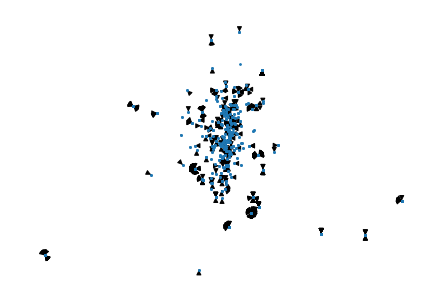

In [12]:
nx.draw(g, with_labels=False, pos=nx.spectral_layout(g), node_size=3)

In [15]:
g.nodes.data()

NodeDataView({'2002000001': {}, '1000000003': {'age': '50s'}, '1000000002': {'age': '30s'}, '1000000005': {'age': '20s'}, '1000000006': {'age': '50s'}, '1000000007': {'age': '20s'}, '1000000010': {'age': '60s'}, '1000000017': {'age': '70s'}, '1000000013': {'age': '80s'}, '1000000014': {'age': '60s'}, '1000000016': {'age': '70s'}, '1000000021': {'age': '80s'}, '1000000019': {'age': '70s'}, '1000000015': {'age': '70s'}, '1000000020': {'age': '70s'}, '1000000022': {'age': '30s'}, '1000000025': {'age': '60s'}, '1000000028': {'age': '70s'}, '1000000029': {'age': '20s'}, '1000000031': {'age': '50s'}, '1000000033': {'age': '50s'}, '1000000034': {'age': '20s'}, '1000000037': {'age': '40s'}, '1500000002': {'age': '60s'}, '1000000040': {'age': '60s'}, '1000000045': {'age': '40s'}, '1000000041': {'age': '50s'}, '1000000046': {'age': '20s'}, '1000000054': {'age': '80s'}, '1000000053': {'age': '40s'}, '1000000060': {'age': '80s'}, '1000000059': {'age': '60s'}, '1000000061': {'age': '60s'}, '2017000

In [16]:
g.edges.data()

OutEdgeDataView([('2002000001', '1000000003', {'infection_case': 'contact with patient'}), ('1000000003', '1000000006', {'infection_case': 'contact with patient'}), ('1000000003', '1000000007', {'infection_case': 'contact with patient'}), ('1000000003', '1000000010', {'infection_case': 'contact with patient'}), ('1000000003', '1000000017', {'infection_case': 'contact with patient'}), ('1000000002', '1000000005', {'infection_case': 'contact with patient'}), ('1000000017', '1000000013', {'infection_case': 'contact with patient'}), ('1000000017', '1000000016', {'infection_case': 'contact with patient'}), ('1000000013', '1000000014', {'infection_case': 'contact with patient'}), ('1000000014', '2000000019', {'infection_case': 'contact with patient'}), ('1000000016', '1000000021', {'infection_case': 'contact with patient'}), ('1000000021', '1000000019', {'infection_case': 'contact with patient'}), ('1000000015', '1000000020', {'infection_case': 'Seongdong-gu APT'}), ('1000000020', '100000007

- 시각화는 별도의 소프트웨어 이용 추천 : [Gephi](https://gephi.org/)


In [14]:
nx.write_graphml_lxml(g, "ko_covid_graph.graphml")